<a href="https://colab.research.google.com/github/OswaldVc/Datos/blob/main/TP-5/Meteorolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

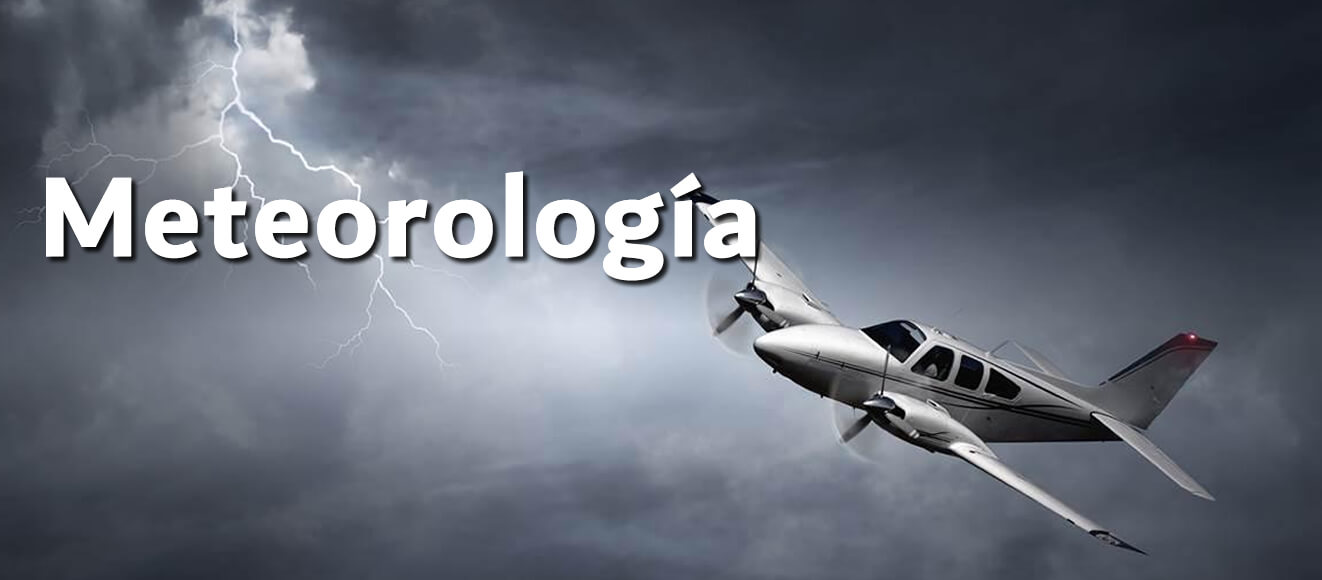

In [1]:
#### ------- Importación de las librerias necesarias ------- ####

import pandas as pd
import numpy as np
import glob 

In [2]:
#### ------- Carga de datos--------------------------------- ####

!wget https://datosclima.es/capturadatos/Aemet2019-01.rar

--2022-09-16 20:37:41--  https://datosclima.es/capturadatos/Aemet2019-01.rar
Resolving datosclima.es (datosclima.es)... 95.217.108.87
Connecting to datosclima.es (datosclima.es)|95.217.108.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1456378 (1.4M) [application/x-rar-compressed]
Saving to: ‘Aemet2019-01.rar.2’

Aemet2019-01.rar.2  100%[===================>]   1.39M  9.02MB/s    in 0.2s    

2022-09-16 20:37:41 (9.02 MB/s) - ‘Aemet2019-01.rar.2’ saved [1456378/1456378]



In [3]:
#### ------- Instala unrar si es necesario--------------------------------- ####

!unrar e -o+ Aemet2019-01.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Aemet2019-01.rar

Extracting  Aemet2019-01-22.xls                                            2%  3%  OK 
Extracting  Aemet2019-01-23.xls                                            5%  6%  OK 
Extracting  Aemet2019-01-24.xls                                            9% 10%  OK 
Extracting  Aemet2019-01-25.xls                                           12% 13%  OK 
Extracting  Aemet2019-01-26.xls                                           15% 16%  OK 
Extracting  Aemet2019-01-27.xls                                           18% 19%  OK 
Extracting  Aemet2019-01-28.xls                                           22% 23%  OK 
Extracting  Aemet2019-01-29.xls                                           25% 26%  OK 
Extracting  Aemet2019-01-30.xls                                           28% 30%  O

In [ ]:
!pip install --upgrade xlrd

In [4]:
all_files = glob.glob("Aemet2019-*.xls")

file_list = []
for f in all_files:
    data = pd.read_excel(f,skiprows=4)
    data['source_file'] = f # nueva columna conteniendo el nombre del fichero leido
    file_list.append(data)
df = pd.concat(file_list)

In [5]:
df.shape

(24707, 13)

In [6]:
df.head()

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),source_file
0,Estaca de Bares,A Coruña,11.1 (15:10),6.0 (09:00),8.6,45 (12:40),36 (14:00),0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls
1,As Pontes,A Coruña,11.2 (14:50),-3.2 (08:50),4.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls
2,A Coruña,A Coruña,12.8 (15:30),3.6 (08:10),8.2,18 (05:00),13 (04:40),0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls
3,A Coruña Aeropuerto,A Coruña,11.9 (15:40),-2.5 (08:40),4.7,26 (23:00),17 (09:40),0.1,0.0,0.1,0.0,0.0,Aemet2019-01-05.xls
4,"Carballo, Depuradora",A Coruña,15.5 (16:40),-4.9 (09:20),5.3,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls


# Limpieza de datos

In [7]:

#### ------- Limpieza de datos ----------------------------------------------------------------------------------- ####
#### Podemos empezar renombrando las columnas para que sea mas sencillo usarlas y ocupen menos espacio en pantalla.####


df=df.rename(columns={'Estación': 'estacion','Provincia':'provincia','Temperatura máxima (ºC)':'temp_max','Temperatura mínima (ºC)':'temp_min',
                      'Temperatura media (ºC)':'temp_med','Racha (km/h)':'viento_racha','Velocidad máxima (km/h)':'viento_vel_max',
                      'Precipitación 00-24h (mm)':'prec_dia','Precipitación 00-06h (mm)':'prec_0_6h','Precipitación 06-12h (mm)':'prec_6_12h',
                      'Precipitación 12-18h (mm)':'prec_12_18h','Precipitación 18-24h (mm)':'prec_18_24h','source_file':'fecha'})
df.head(1)


,estacion,provincia,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h,fecha
0,Estaca de Bares,A Coruña,11.1 (15:10),6.0 (09:00),8.6,45 (12:40),36 (14:00),0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls


In [8]:
df=df.replace(to_replace=r'.\(.+\)$', value='', regex=True)
df.head(1)

,estacion,provincia,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h,fecha
0,Estaca de Bares,A Coruña,11.1,6.0,8.6,45,36,0.0,0.0,0.0,0.0,0.0,Aemet2019-01-05.xls


In [9]:
df.fecha=df.fecha.replace(regex={'Aemet':'',r'\.+xls':''})
df.head(1)

,estacion,provincia,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h,fecha
0,Estaca de Bares,A Coruña,11.1,6.0,8.6,45,36,0.0,0.0,0.0,0.0,0.0,2019-01-05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24707 entries, 0 to 796
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   estacion        24707 non-null  object 
 1   provincia       24707 non-null  object 
 2   temp_max        23650 non-null  object 
 3   temp_min        23650 non-null  object 
 4   temp_med        23650 non-null  float64
 5   viento_racha    20072 non-null  object 
 6   viento_vel_max  20203 non-null  object 
 7   prec_dia        23366 non-null  float64
 8   prec_0_6h       23565 non-null  float64
 9   prec_6_12h      23565 non-null  float64
 10  prec_12_18h     23584 non-null  float64
 11  prec_18_24h     23563 non-null  float64
 12  fecha           24707 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.6+ MB


In [11]:
df=df.astype({'estacion': 'string','provincia': 'string', 'temp_max':'float64', 'temp_min':'float64', 
              'viento_racha':'float64', 'viento_vel_max':'float64', 'fecha': 'datetime64[ns]'})
        
df['fecha']=pd.to_datetime(df["fecha"].dt.strftime('%Y-%m-%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24707 entries, 0 to 796
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   estacion        24707 non-null  string        
 1   provincia       24707 non-null  string        
 2   temp_max        23650 non-null  float64       
 3   temp_min        23650 non-null  float64       
 4   temp_med        23650 non-null  float64       
 5   viento_racha    20072 non-null  float64       
 6   viento_vel_max  20203 non-null  float64       
 7   prec_dia        23366 non-null  float64       
 8   prec_0_6h       23565 non-null  float64       
 9   prec_6_12h      23565 non-null  float64       
 10  prec_12_18h     23584 non-null  float64       
 11  prec_18_24h     23563 non-null  float64       
 12  fecha           24707 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), string(2)
memory usage: 2.6 MB


In [12]:
df.isna().sum()

estacion             0
provincia            0
temp_max          1057
temp_min          1057
temp_med          1057
viento_racha      4635
viento_vel_max    4504
prec_dia          1341
prec_0_6h         1142
prec_6_12h        1142
prec_12_18h       1123
prec_18_24h       1144
fecha                0
dtype: int64

In [14]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isna().sum()

estacion          0
provincia         0
temp_max          0
temp_min          0
temp_med          0
viento_racha      0
viento_vel_max    0
prec_dia          0
prec_0_6h         0
prec_6_12h        0
prec_12_18h       0
prec_18_24h       0
fecha             0
dtype: int64

# Análisis de datos

In [16]:
df.describe()

,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h
count,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000
mean,12.386737,2.440713,7.432647,31.277007,18.745335,1.742887,0.417546,0.414117,0.402360,0.531064
std,4.565782,5.182111,4.334640,17.315768,10.663987,6.776043,2.123667,1.998200,1.938378,2.357515
min,-5.000000,-20.500000,-7.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.400000,-1.200000,4.500000,18.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.200000,1.800000,7.000000,26.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.500000,5.700000,10.000000,41.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.800000,19.100000,21.100000,146.000000,116.000000,133.000000,56.000000,38.600000,83.400000,41.300000


In [15]:
df.iloc[:,np.r_[0:8,12:13]].describe()

,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia
count,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000,24707.000000
mean,12.386737,2.440713,7.432647,31.277007,18.745335,1.742887
std,4.565782,5.182111,4.334640,17.315768,10.663987,6.776043
min,-5.000000,-20.500000,-7.400000,0.000000,0.000000,0.000000
25%,9.400000,-1.200000,4.500000,18.000000,13.000000,0.000000
50%,12.200000,1.800000,7.000000,26.000000,14.000000,0.000000
75%,15.500000,5.700000,10.000000,41.000000,23.000000,0.000000
max,27.800000,19.100000,21.100000,146.000000,116.000000,133.000000


Ahora vamos a mostrar 5 filas al azar como muestreo de los datos. También es un ejemplo de selección de columnas por expresion regular (seleccionamos las que empiezan por el prefijo «temp_»)

In [17]:
df.filter(regex='^temp_*', axis=1).sample(5)

,temp_max,temp_min,temp_med
460,10.2,-4.2,3.0
410,9.3,-1.0,4.2
74,7.0,1.4,4.2
508,13.5,-3.0,5.3
199,16.3,6.7,11.5


***Medias por provincia***
A continuación mostraremos la media de los valores de cada columna agrupándolos por provincia.

***Podemos observar que el método es lo suficientemente inteligente para mostrarnos solo columnas de tipo numérico.***

Les mostramos el contenido de las 4 primeras provincias (por orden alfabético) y de las 6 primeras columnas:**texto en negrita**

In [19]:
df.groupby("provincia").mean()

,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h
provincia,,,,,,,,,,
A Coruña,12.248185,4.561694,8.424194,31.377016,20.602823,4.229234,0.807460,1.427218,1.149194,0.868750
Alacant/Alicante,16.140054,4.381989,10.281989,29.481183,17.465054,0.059946,0.028226,0.003226,0.011828,0.016667
Albacete,12.405211,-0.278412,6.103474,25.235732,14.933002,0.191811,0.068983,0.060298,0.012407,0.062035
Almería,15.474194,5.455718,10.517595,33.011730,21.369501,0.085337,0.044575,0.017889,0.004692,0.018182
Araba/Álava,7.778629,1.143952,4.466532,27.677419,16.564516,6.011290,1.641532,1.420565,1.076613,1.916532
Asturias,10.174334,2.551473,6.390743,31.339411,17.619916,5.948387,1.461431,1.381627,1.561992,1.652875
Badajoz,14.013885,2.133801,8.075736,26.964937,17.248247,0.578822,0.110238,0.062693,0.086396,0.319495
Barcelona,11.299232,1.241628,6.286329,26.643625,15.129032,0.426575,0.133794,0.230261,0.015668,0.046851
Bizkaia,9.800293,4.056012,6.941935,35.131965,21.073314,8.703226,2.399120,2.234604,1.713783,2.363930


***Mayores temperaturas máximas por estación***
Vamos a mostrar los 3 valores mas altos de temperatura máxima que se han registrado en el mes.

Es un ejemplo de cómo ordenar por columna, ***mostramos solo las columnas que nos interesan y de esas columnas mostramos solo las primeras 3 filas.***

In [20]:
df.sort_values(by='temp_max',ascending=False)[['fecha','estacion','provincia','temp_max']].head(3)


,fecha,estacion,provincia,temp_max
437,2019-01-13,La Aldea de San Nicolás,Las Palmas,27.8
676,2019-01-13,La Palma Aeropuerto,Santa Cruz de Tenerife,26.1
427,2019-01-26,Pájara,Las Palmas,25.7


Menores temperaturas mínimas por estación

In [21]:
df.sort_values(by='temp_min',ascending=True)[['fecha','estacion','provincia','temp_min']].head(5)


,fecha,estacion,provincia,temp_min
522,2019-01-21,Villanueva de la Cañada,Madrid,-20.5
639,2019-01-06,Cuéllar,Segovia,-12.1
763,2019-01-06,Sardón de Duero,Valladolid,-11.8
639,2019-01-07,Cuéllar,Segovia,-11.4
18,2019-01-11,Munera,Albacete,-11.3


***Máximas diferencias entre temperatura max y min por provincia***

Ahora calcularemos una nueva columna restando de la temperatura máxima la temperatura mínima. Vemos que simplemente restamos columnas. Pandas es intuitivo.

In [23]:
df['diff_temp_min_max']=df['temp_max']-df['temp_min']
df.iloc[df.reset_index().groupby('provincia')['diff_temp_min_max'].idxmax()].sort_values(by='diff_temp_min_max',ascending=False)[['fecha','estacion','provincia','diff_temp_min_max','temp_min','temp_max']].head(3)

,fecha,estacion,provincia,diff_temp_min_max,temp_min,temp_max
522,2019-01-21,Villanueva de la Cañada,Madrid,30.9,-20.5,10.4
763,2019-01-06,Sardón de Duero,Valladolid,26.6,-11.8,14.8
639,2019-01-06,Cuéllar,Segovia,26.6,-12.1,14.5


Mayores rachas de viento en un día por provincia

In [24]:
df.iloc[df.reset_index().groupby('provincia')['viento_racha'].idxmax()].sort_values(by='viento_racha',ascending=False)[['fecha','estacion','provincia','viento_racha']].head(5)


,fecha,estacion,provincia,viento_racha
0,2019-01-29,Estaca de Bares,A Coruña,146.0
139,2019-01-29,Machichaco,Bizkaia,144.0
464,2019-01-28,Puerto de San Isidro,León,129.0
231,2019-01-27,La Pobla de Benifassà-Fredes,Castelló/Castellón,129.0
370,2019-01-27,"Sierra de Alfabia, Bunyola",Illes Balears,127.0


Mayores velocidades de viento medio en un día por provincia


In [25]:
df.iloc[df.reset_index().groupby('provincia')['viento_vel_max'].idxmax()].sort_values(by='viento_vel_max',ascending=False)[['fecha','estacion','provincia','viento_vel_max']].head(5)


,fecha,estacion,provincia,viento_vel_max
747,2019-01-23,Zarra,València/Valencia,116.0
139,2019-01-23,Machichaco,Bizkaia,113.0
0,2019-01-29,Estaca de Bares,A Coruña,103.0
322,2019-01-04,Campisábalos,Guadalajara,84.0
381,2019-01-24,Capdepera,Illes Balears,83.0


Máximas velocidades de viento por provincia de media


In [26]:
df.groupby('provincia').mean()[['viento_vel_max']].sort_values(by='viento_vel_max',ascending=False).head(5)


,viento_vel_max
provincia,
Teruel,26.552182
Zaragoza,26.400922
Castelló/Castellón,25.635484
Soria,25.017370
Tarragona,22.279570


Máximas diferencias de temperatura máxima entre días


In [27]:
df['temp_max_shifted']=df.groupby('estacion')['temp_max'].transform('shift')
df['dif_prev_temp_max']=df.temp_max-df.temp_max_shifted
df.iloc[df.reset_index().groupby('provincia')['dif_prev_temp_max'].idxmax()].sort_values(by='dif_prev_temp_max',ascending=False)[['fecha','estacion','provincia','dif_prev_temp_max']].head(5)

,fecha,estacion,provincia,dif_prev_temp_max
637,2019-01-02,"La Pinilla, estación de esquí",Segovia,15.1
719,2019-01-02,Mosqueruela,Teruel,15.0
503,2019-01-02,Puerto de Navacerrada,Madrid,14.9
152,2019-01-04,Palacios de la Sierra,Burgos,14.8
82,2019-01-02,Puerto de Leitariegos,Asturias,14.2


***Racha de días seguidos lloviendo por provincia y estación***

El proceso de obtener rachas, es decir, número de días en los que pasa un suceso (en este caso llover) consecutivamente es un proceso algo más elaborado pero que se puede realizar en unas pocas líneas de código aprovechando las siguientes funcionalidades del dataframe:

***Creación de una nueva columna*** cuyo valor se obtiene a partir de otra columna aplicando una función lambda (cálculo de la columna «llueve»).
***Comparación de valores*** (operador «ne») entre columnas de una misma fila.
***Desplazamiento*** (método «shift») de una columna para disponer de datos anteriores en la misma fila.
***Generación de un número secuencial*** (identificador) de los elementos de cada grupo (método «cumsum»).
***Cálculo del número de elementos de un grupo*** (método «cumcount»).
***Asignación de un valor a una columna*** para las filas que cumplan una condición (llueve==0).

In [28]:
df['llueve']=df.prec_dia.apply(lambda x: 1 if x>0 else 0)

df.sort_values(by=['estacion','fecha'],ascending=True,inplace=True,ignore_index=True)

df['start_of_streak'] = df.llueve.ne(df['llueve'].shift())

df['estacion_anterior']=df['estacion'].shift()
df.loc[(df['estacion'].ne(df['estacion_anterior'])), 'start_of_streak'] = True

df['streak_id'] = df['start_of_streak'].cumsum()
df['dias_seguidos_lloviendo'] = df.groupby('streak_id').cumcount() + 1
df.loc[(df['llueve']==0), 'dias_seguidos_lloviendo'] = 0

df.iloc[df.reset_index().groupby(['provincia','estacion'])['dias_seguidos_lloviendo'].idxmax()].sort_values(by='dias_seguidos_lloviendo',ascending=False)[['estacion','provincia','dias_seguidos_lloviendo']].head(10)

,estacion,provincia,dias_seguidos_lloviendo
8090,Elgeta,Gipuzkoa,25
17483,Punta Galea,Bizkaia,23
247,Abadiño,Bizkaia,22
24551,Zumarraga,Gipuzkoa,20
8679,Forua,Bizkaia,18
15716,Orozko,Bizkaia,18
19622,Santiago de Compostela,A Coruña,16
12089,Llanes,Asturias,16
4804,Burela,Lugo,16
12616,Lugo,Lugo,16


***Dónde llueve menos días seguidos por provincia y estación***


In [29]:
df.iloc[df.reset_index().groupby(['provincia','estacion'])['dias_seguidos_lloviendo'].idxmax()].sort_values(by='dias_seguidos_lloviendo',ascending=True)[['estacion','provincia','dias_seguidos_lloviendo']].head(10)


,estacion,provincia,dias_seguidos_lloviendo
19437,Santa Susanna,Barcelona,0
6727,Chinchilla,Albacete,0
8804,"Frontera, Sabinosa",Santa Cruz de Tenerife,0
12865,Madridejos,Toledo,0
8432,Figueres,Girona,0
1736,Almería Aeropuerto,Almería,0
7812,El Ejido,Almería,0
18135,Roquetas de Mar,Almería,0
12431,"Lorca, Zarcilla de Ramos",Murcia,0
12152,Llimiana,Lleida,0


Mostrar cuántas estaciones hay por provincia y un total general
Podemos tener copias «temporales» del dataframe para hacer operaciones sin destruir el original. Te lo ilustramos a través de este ejemplo.

Supongamos que queremos obtener el número de estaciones meteorológicas que hay por cada provincia.

Para ello nos quedamos con solo las columnas relevantes: provincia y estación. Luego eliminamos las filas duplicadas para tener los pares únicos de provincia-estación.

Ya nos queda simplemente agrupar por provincia y sacar el número de filas por cada grupo. Todo eso lo hacemos en 1 sola línea de código.

Finalmente añadimos otra fila adicional al resultado con el total de estaciones (un SUM típico de Excel).

In [30]:
df_estaciones=df[['provincia','estacion']].drop_duplicates().groupby('provincia').count()
df_estaciones.loc['Total de estaciones'] = df_estaciones['estacion'].sum()
df_estaciones

,estacion
provincia,
A Coruña,16
Alacant/Alicante,12
Albacete,13
Almería,11
Araba/Álava,8
Asturias,23
Badajoz,23
Barcelona,21
Bizkaia,11
